In [ ]:
'''
Flowchart for end-to-end ML Model -
(1) Importing important libraries
(2) Importing the data (Data Gathering)
(3) Getting an understanding about the data that we are working with
(4) Getting an understanding about the business problem that you are trying to solve
(5) Basic EDA -> Approximate Patterns in the data
(6) Approximate Patterns in the data -> Shortlist 2-3 ML Models (Shortlisting ML Models)
(7) Seperately Cleaning and Pre-Processing the data for all the ML Models (Data Cleaning and Data Pre-Processing)
(8) Feature Engineering and Feature Selection
(9) Performing train test split on the historical data
(10) Training the ML model on training data (Model Training)
(11) Evaluate the predictive performance of ML model on testing data (Model Evaluation)
(12) If the evaluation results are according to the expectations, then go to step 14
(13) If the evaluation results are NOT according to the expectations, then
optimize the model. (Model Optimization)
(14) Deploy the model into production. (Model Deployment)
(15) Monitoring and Maintainance work for the model. (MLOps)
'''

In [ ]:
# Installing scikit-learn
!pip install scikit-learn

In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Getting the data
df = pd.read_csv('boston.csv', index_col = 0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
'''
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.

.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
'''

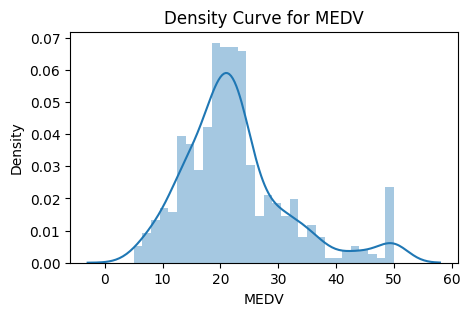

In [ ]:
# Outlier Analysis on Target Variable
plt.figure(figsize = (5, 3))
sns.distplot(df['MEDV'], bins = 30)
plt.title('Density Curve for MEDV')
plt.show()

In [ ]:
# Removing Outliers
df = df[df['MEDV'] < 40]

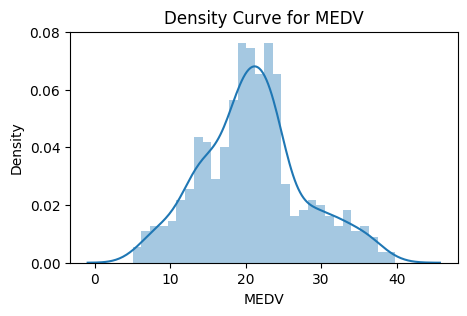

In [ ]:
# Outlier Analysis on Target Variable
plt.figure(figsize = (5, 3))
sns.distplot(df['MEDV'], bins = 30)
plt.title('Density Curve for MEDV')
plt.show()

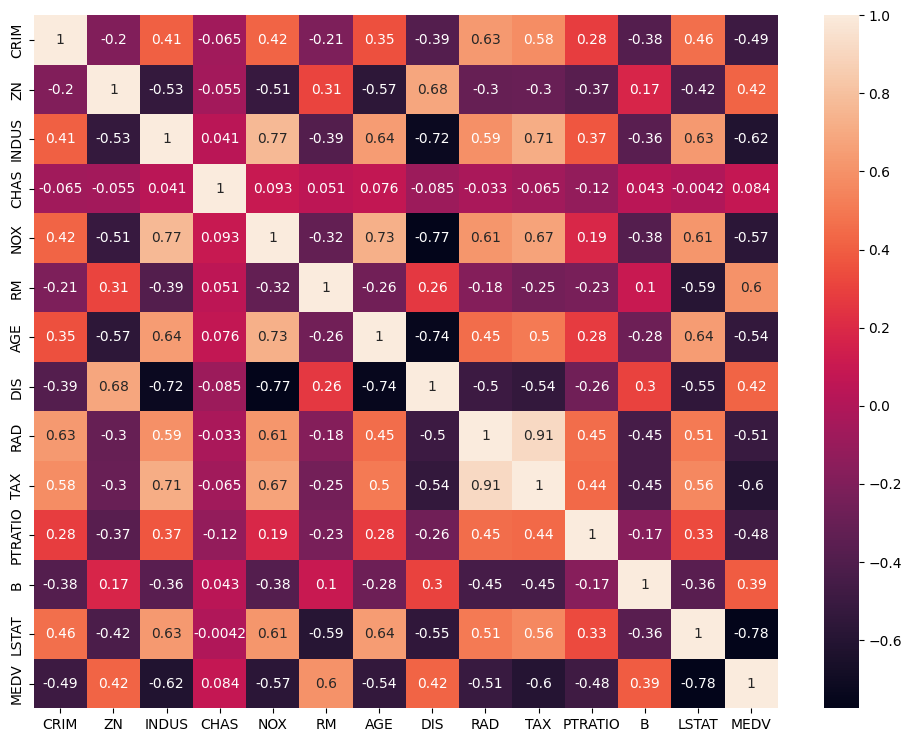

In [ ]:
# Performing MultiCollinearity Test
cm = df.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# The above chart gives Pearson's Correlation Coefficient
# It is in the range of [-1, 1]
# -1 indicates perfect negative correlationship
# 1 indicates perfect positive correlationship
# 0 indicates that the two features are perfectly uncorrelated

In [ ]:
# We have to find the input features
# which have a strong relationship w.r.t. Target variable
# (Either strong positive or strong negative)
# and are uncorrelated amoung themselves

In [ ]:
# LSTAT, INDUS, RM and TAX could be the possible input features
# LSTAT is having the strongest relationship w.r.t Target variable
# hence it would be there in the ML model
# INDUS, RM and TAX are having correlationship with LSTAT,
# hence those features would not be there in the model building process.

In [ ]:
'''
We will create 2 different models ->
1) LSTAT -> MEDV (Simple Linear Regression)
2) RM, LSTAT -> MEDV (Multiple Linear Regression)
'''

In [ ]:
# 1st Model ->

In [ ]:
# Seperating input and output features
X = df['LSTAT'].to_numpy().reshape(-1, 1)
y = df['MEDV']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.62
Training R2 Score : 0.6


In [ ]:
# RMSE
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Training RMSE : 4.33
Testing RMSE : 4.13


In [ ]:
# Model 2 ->

In [ ]:
# Seperating the data into input and output features
X = df[['RM', 'LSTAT']]
y = df['MEDV']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Model Training
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Taking prediction from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.68
Training R2 Score : 0.62


In [ ]:
# Model Evaluation
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))

Testing RMSE : 3.8
Training RMSE : 4.19
